In [1]:
import time
import pandas as pd
import numpy as np
import datetime as dat
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

In [3]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!\n')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    while True:
        try:
            city_ref = int(input('What city would you like to get insight on?\navailable cities are chicago, new york city and washington.\npress 1  for chicago\npress 2 for new york city\npress 3 for washington\n'))

            city_list = ('chicago', 'new york city', 'washington')
            
        
        except Exception as e:
            print('\nPlease check your input!,\n Exception Occurred: {}, \n\n we don\'t have that city on our database\n'.format(e))
        
        else:
            city = city_list[(city_ref - 1)]
            break
    # TO DO: get user input for month (all, january, february, ... , june)
    while True:
        try:
            month = input('What month would you be interested in(Available for Jan - June)? \n input "ALL" if you prefer to see for all months: ').lower()
            assert month in ('all', 'january', 'february', 'march', 'april', 'may', 'june')
            
            break

        except Exception as e:
            print('Please check your input!,\n Exception Occurred: {}, \n\n You could have misspelt something or no data for selected month\n'.format(e))

    while True:
        try:
            day = input('What day are you interested in? \n input "ALL" if you prefer to see for all days: ').title()
            assert day in ('All', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')
            
            break

        except Exception as e:
            print('Please check your input!,\n Exception Occurred: {}, \n\n You could have misspelt something\n'.format(e))

    return city, month, day

print('-'*40 + '\n')


----------------------------------------



In [10]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    print('\n' + '.'*20 + 'retrieving data\n')
    df = pd.read_csv(CITY_DATA[str(city)])
    
    #rename unnamed column to Trip_id since each number is unique
    df.rename(columns ={'Unnamed: 0':'Trip_id'},inplace=True)
    
    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['month_name'] = df['Start Time'].dt.month_name()
    df['day_of_week'] = df['Start Time'].dt.day_name()


    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(str(month)) + 1

        # filter by month to create the new dataframe
        df = df.loc[df['month'] == month]

    # filter by day of week if applicable
    if day != 'All':
        # filter by day of week to create the new dataframe
        df = df.loc[df['day_of_week'] == str(day)]
    print('\nData Retrieved!!!\n')

    while True:
            try:
                preview = input('\nWould you like to preview the raw data? Enter yes or no.\n').lower()
                break

            except:
                print('oops!!!, check your input and try again\n')
    if preview == 'yes':
        print('\n','.'*10 + "loading city data\n")
        print('\n\n', df.head(), '\n')
        
        # Ask if user would like to view more raw data and in how many steps
        while True:
            try:
                preview_more = input('\nWould you like to preview more raw data? Enter yes or no.\n').lower()
                start_index = 5
                break
            except:
                print('\noops!!!, check your input and try again\n')

        if preview_more == 'yes':
            while len(df)-1 >= start_index+10:
                while True:
                    try:
                        steps = int(input('How many more rows would you like to see? (number from 1 - 10): \n'))
                        assert steps in range(11)
                        break
                    except:
                        print('\noops!!!, check your input and try again\n')

                print('\n','.'*10 + "loading {} more rows of city data\n".format(steps))
                print('\n', df.iloc[(start_index + 1):(start_index + 1 +steps)], '\n')
                start_index += steps

                #ask if user would like to view more
                while True:
                    try:
                        see_more = input('\nWould you like to preview more raw data? Enter yes or no.\n').lower()
                        break
                    except:
                        print('\noops!!!, check your input and try again\n')

                if see_more != 'yes':
                    print('\n\nAlright then, let\'s have a fun experience exploring your selected data.\n')
                    break

    else:
        print('\n\nAlright then, let\'s have a fun experience exploring your selected data.\n')


    return df

def time_stats(df, city, month, day):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    if 'Start Time' and 'End Time' and 'month' and 'day_of_week' in set(df.columns):
        # TO DO: display the most common month
        if month == 'all':
            most_common_month = df['month'].mode()
            print('\nThe most common month(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
            for value in most_common_month.values:
                print(value)

        # TO DO: display the most common day of week
        if day == 'All':
            most_common_day = df['day_of_week'].mode()
            print('\nThe most common day(s) of the week for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
            for value in most_common_day.values:
                print(value)

     # TO DO: display the most common start hour
        df['start hour'] = df['Start Time'].dt.hour
        most_common_start_hour = df['start hour'].mode()
        print('\nThe most common start hour(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in most_common_start_hour.values:
            print(value, '(00)hrs')

    # TO DO: display the most common end hour
        df['end hour'] = pd.to_datetime(df['End Time']).dt.hour
        most_common_end_hour = df['end hour'].mode()
        print('\nThe most common end hour(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in most_common_end_hour.values:
            print(value, '(00)hrs')

    # display a count for total number of completed trips
        trip_count = df['end hour'].count()
        print('\nThe total number of trips for City: {}, Month: {}, Day: {} is:\n{} {}'.format(city,month,day,trip_count,'Trip(s)'))


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)



def station_stats(df, city, month, day):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    if 'Start Station' in set(df.columns):
        common_start_station = df['Start Station'].mode()
        print('\nThe most commonly used start station(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in  common_start_station.values:
            print(value)

    # TO DO: display most commonly used end station
    if 'End Station' in set(df.columns):
        common_end_station = df['End Station'].mode()
        print('\nThe most commonly used end station(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in common_end_station.values:
            print(value)

    # TO DO: display most frequent combination of start station and end station trip
    if 'Start Station' in set(df.columns) and 'End Station' in set(df.columns):
        df['Trip Combination'] = df['Start Station'] + ' ' + 'to' + ' ' + df['End Station']
        most_common_trip = df['Trip Combination'].mode()
        print('\nThe most frequent trip(s) for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in most_common_trip.values:
            print(value)
        
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df, city, month, day):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # TO DO: display total travel time
    if 'Trip Duration' in set(df.columns):
        total_travel_time = df['Trip Duration'].sum()
        print('\nThe total travel time for City: {}, Month: {}, Day: {} is:\n{} {}'.format(city,month,day,total_travel_time,'Seconds'))

    # TO DO: display mean travel time
        mean_travel_time = np.mean(df['Trip Duration'])
        print('\nThe mean travel time for City: {}, Month: {}, Day: {} is:\n{} {}'.format(city,month,day,mean_travel_time,'Seconds'))


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    

def user_stats(df, city, month, day):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    if 'User Type' in set(df.columns):
        user_type_count = df['User Type'].value_counts()
        print('\nThe User type Count for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day),user_type_count)

    # TO DO: Display counts of gender
    if 'Gender' in set(df.columns):
        gender_count = df['Gender'].value_counts()
        print('\nThe Gender Count for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day),gender_count)

    # TO DO: Display earliest, most recent, and most common year of birth
    if 'Birth Year' in set(df.columns):
        earliest_yob = int(df['Birth Year'].min())
        print('\nThe earliest year of birth of users for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day),earliest_yob)

        most_recent_yob = int(df['Birth Year'].max())
        print('\nThe most recent year of birth of users for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day),most_recent_yob)

        most_common_yob = df['Birth Year'].mode()
        print('\nThe most common year(s) of birth of users for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day))
        for value in most_common_yob.values:
            print(int(value))
        

    # Display age range distribution of users
    # The code block below was gotten from defltstack.com literature and modified to access current year
    current_DateTime = dat.datetime.now()
    current_date = current_DateTime.date()
    current_year = int(current_date.strftime("%Y"))

    # create new column to label age class distribution
    if 'Birth Year' in df.columns:
        #create a new column for age class
        df['Age Class'] = df['Birth Year'].copy()

        # modify age class column to labels for age class
        for row in df.itertuples():
            i = row.Index
            if (current_year-2)<=df.loc[i,'Birth Year'] and df.loc[i,'Birth Year']<(current_year + 1):
                df.loc[i, 'Age Class'] = 'Babies (0-2yrs)'
            elif (current_year - 16)<=df.loc[i,'Birth Year'] and df.loc[i,'Birth Year']<(current_year - 2):
                df.loc[i, 'Age Class'] = 'Children (3-16yrs)'
            elif (current_year - 30)<=df.loc[i,'Birth Year'] and df.loc[i,'Birth Year']<(current_year - 16):
                df.loc[i, 'Age Class'] = 'Young Adults (17-30yrs)'
            elif (current_year - 45)<=df.loc[i,'Birth Year'] and df.loc[i,'Birth Year']<(current_year - 30):
                df.loc[i, 'Age Class'] = 'Middle aged Adults (31-45yrs)'
            else:
                df.loc[i, 'Age Class'] = 'Old Adults (above 45yrs)'


        # get count of distinct values in age class column
        age_dist_count = df['Age Class'].value_counts()
        print('\nThe age demographic for City: {}, Month: {}, Day: {} is:\n'.format(city,month,day),age_dist_count)


    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
city, month, day = get_filters()
df = load_data(city, month, day)
time_stats(df, city, month, day)
station_stats(df, city, month, day)
trip_duration_stats(df, city, month, day)
user_stats(df, city, month, day)

Hello! Let's explore some US bikeshare data!

What city would you like to get insight on?
available cities are chicago, new york city and washington.
press 1  for chicago
press 2 for new york city
press 3 for washington
2
What month would you be interested in(Available for Jan - June)? 
 input "ALL" if you prefer to see for all months: all
What day are you interested in? 
 input "ALL" if you prefer to see for all days: all

....................retrieving data


Data Retrieved!!!


Would you like to preview the raw data? Enter yes or no.
no


Alright then, let's have a fun experience exploring your selected data.


Calculating The Most Frequent Times of Travel...


The most common month(s) for City: new york city, Month: all, Day: All is:

6

The most common day(s) of the week for City: new york city, Month: all, Day: All is:

Wednesday

The most common start hour(s) for City: new york city, Month: all, Day: All is:

17 (00)hrs

The most common end hour(s) for City: new york city, Month

Hello! Let's explore some US bikeshare data!

What city would you like to get insight on?
available cities are chicago, new york city and washington.
press 1  for chicago
press 2 for new york city
press 3 for washington
2
What month would you be interested in(Available for Jan - June)? 
 input "ALL" if you prefer to see for all months: all
What day are you interested in? 
 input "ALL" if you prefer to see for all days: all

....................retrieving data


Data Retrieved!!!


Would you like to preview the raw data? Enter yes or no.
no


Alright then, let's have a fun experience exploring your selected data.


Calculating The Most Frequent Times of Travel...


The most common month(s) for City: new york city, Month: all, Day: All is:

6

The most common day(s) of the week for City: new york city, Month: all, Day: All is:

Wednesday

The most common start hour(s) for City: new york city, Month: all, Day: All is:

17 (00)hrs

The most common end hour(s) for City: new york city, Month

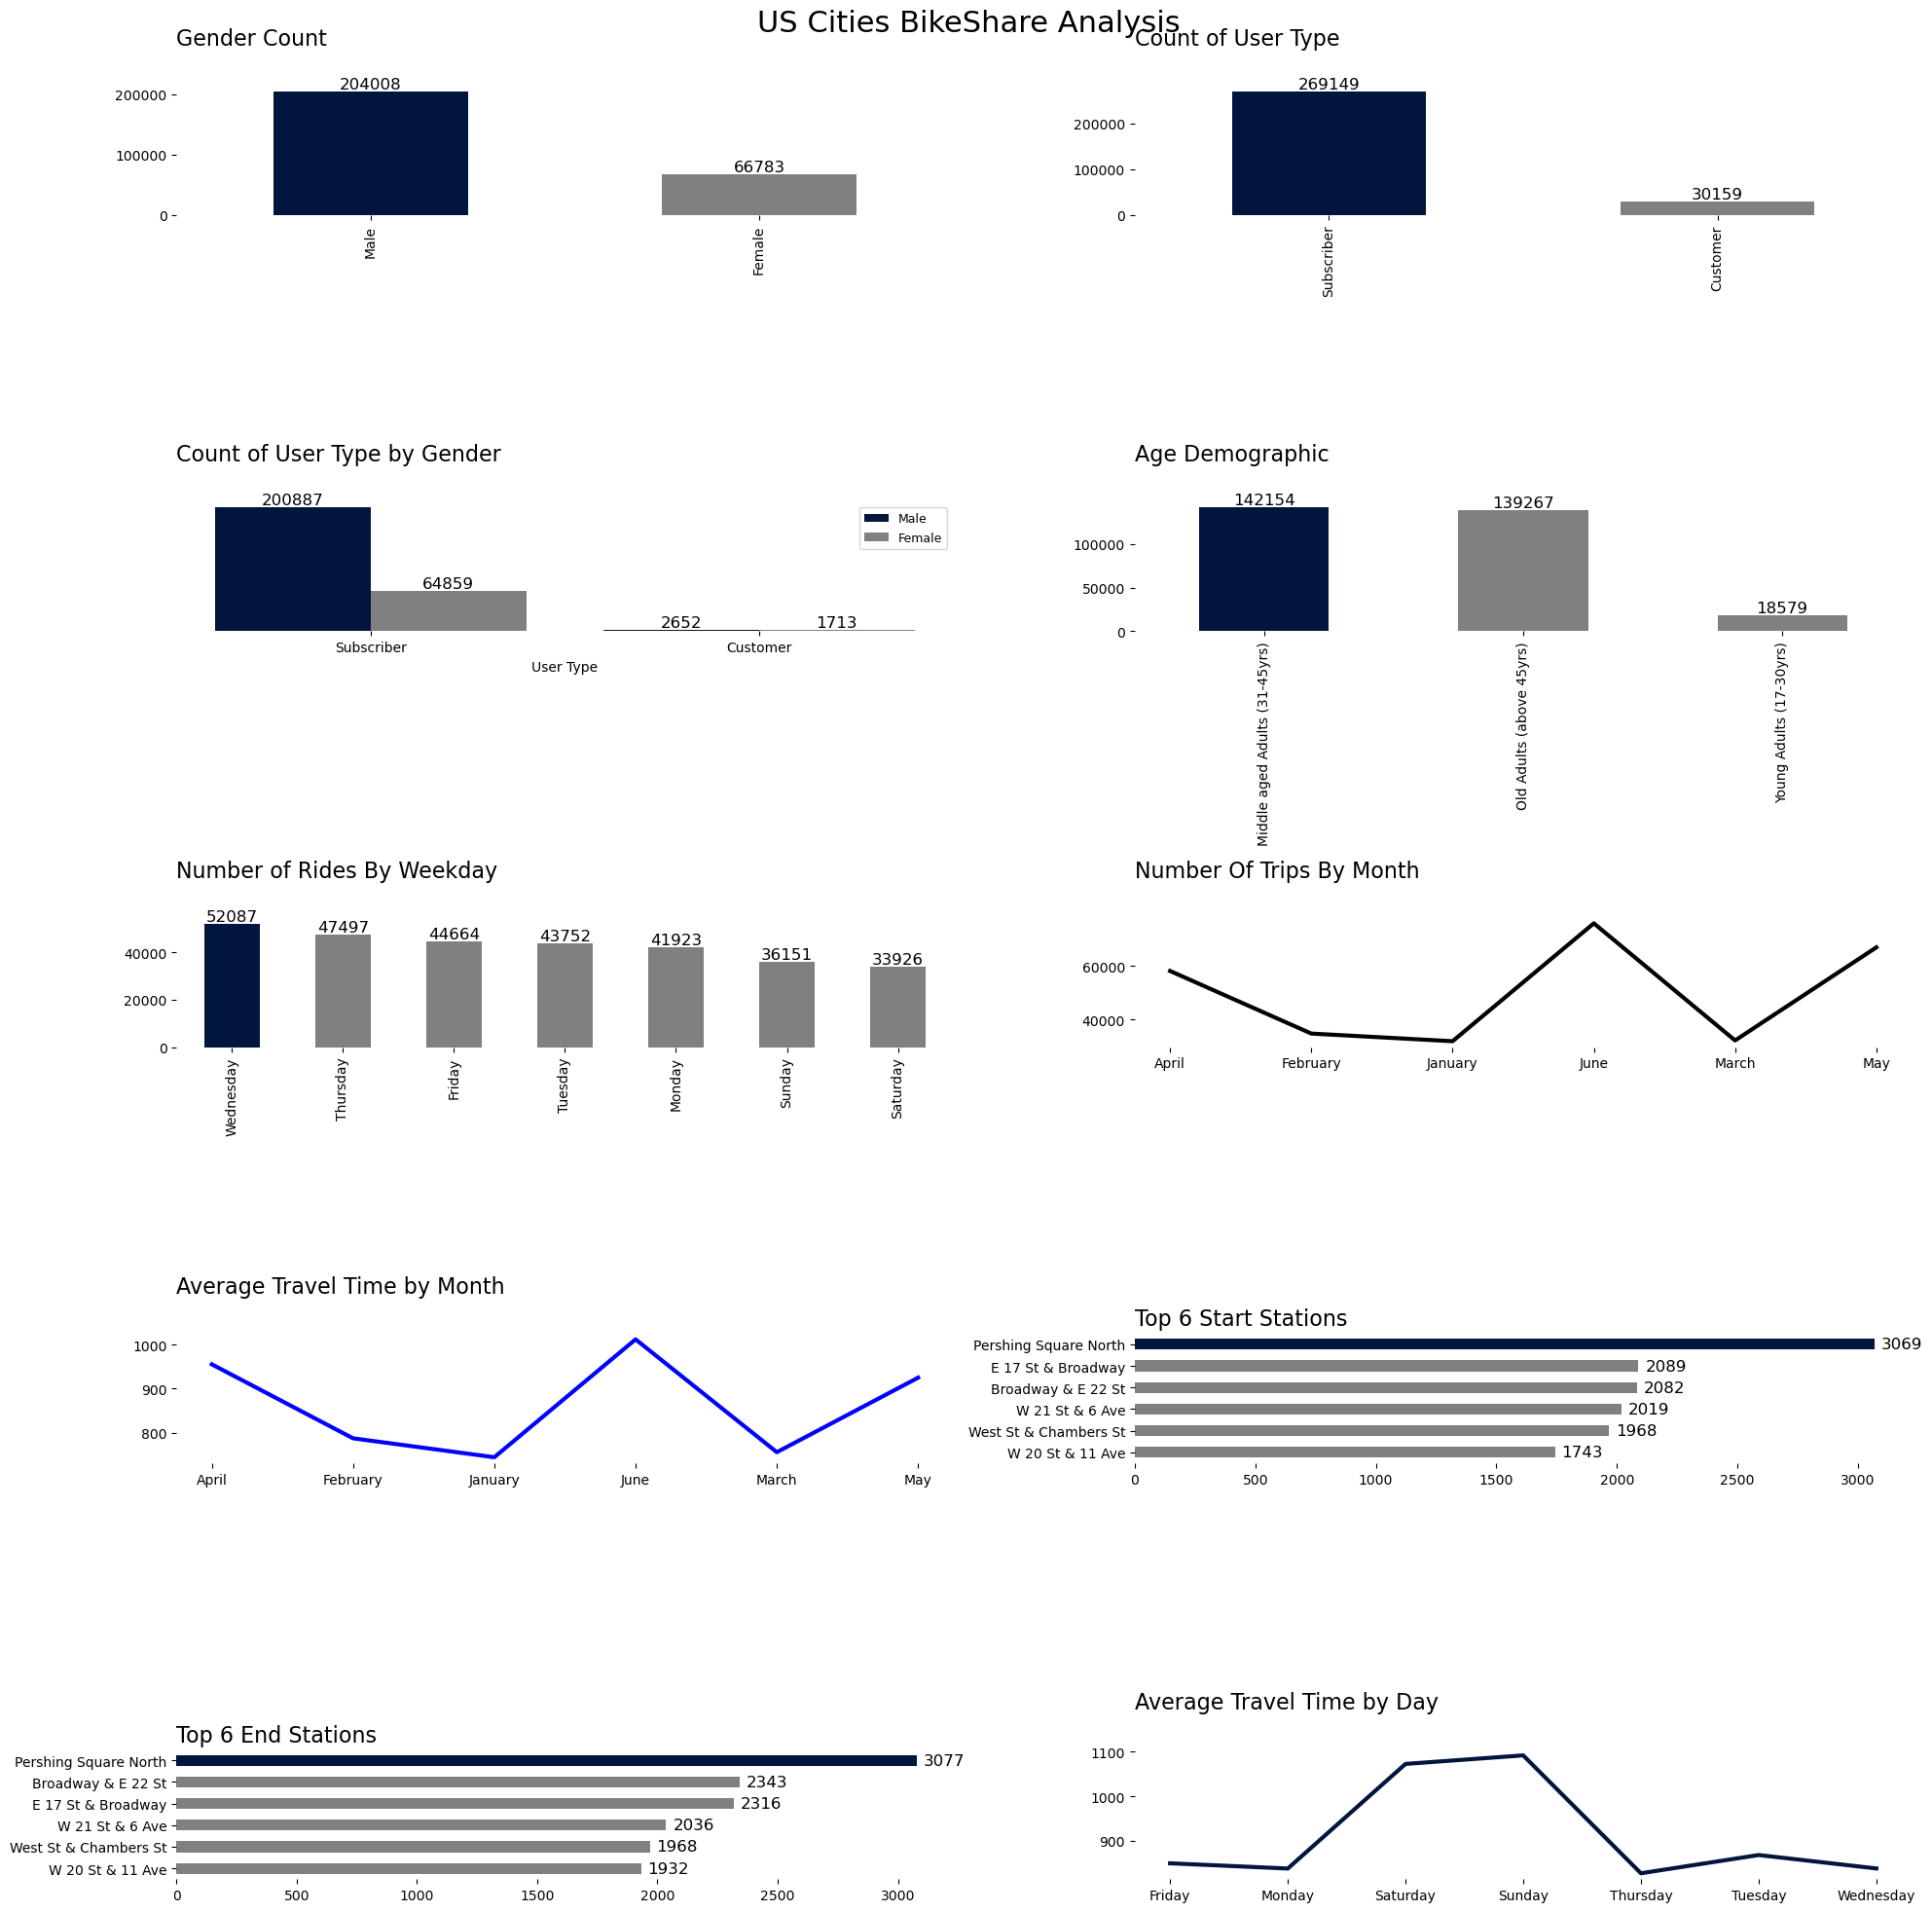


Would you like to see another statistics? Enter yes or no.
no

Would you like to restart? Enter yes or no.
no


In [11]:

def plot(rows=5, cols=2, dashboard_size=(20,20)):
    fig, axs = plt.subplots(rows, cols, figsize=dashboard_size)
    # set the dashboard default color cycle 
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['grey'])
    
    # set the dashboard default edge color 
    plt.rcParams['axes.edgecolor'] = 'none'

    #removing top and right borders of the subplot
    sns.despine()
    
     #plotting count chart for gender
    gender = df['Gender'].value_counts()
    plt1 = gender.plot(kind='bar', legend = False,ax=axs[0,0])
    plt1.set_title('Gender Count',fontsize = 16, loc='left', pad=30)
    for i in plt1.containers:
        plt1.bar_label(i, label_type='edge', fontsize=12)
    plt1.set_xlabel('')
    plt1.patches[0].set_facecolor('xkcd:'+'navy')
    
     #plotting a count chart for user type
    user_count = df['User Type'].value_counts()
    plt2= user_count.plot(kind='bar', legend=False, ax=axs[0,1])
    axs[0,1].set_title('Count of User Type', fontsize = 16, loc='left', pad=30)   
    for i in plt2.containers:
        plt2.bar_label(i, label_type='edge', fontsize=12)
    plt2.set_xlabel('')
    plt2.patches[0].set_facecolor('xkcd:'+'navy')
    
     #plotting usertype by gender
    plt3= sns.countplot(data=df, x='User Type', hue='Gender',palette=['xkcd:'+'navy','grey',"dark grey"], ax=axs[1, 0])
    axs[1, 0].set_title('Count of User Type by Gender', fontsize = 16, loc='left', pad=30)   
    for i in plt3.containers:
        plt3.bar_label(i, label_type='edge', fontsize=12)
    plt3.set_yticks([])
    plt3.set_yticklabels([])
    plt3.set_ylabel('')
    plt3.legend(loc=1, fontsize=9)
    plt3.patches[0].set_facecolor('xkcd:'+'navy')

    #Age plot
    age_dist_count = df['Age Class'].value_counts()
    plt4= age_dist_count.plot(kind='bar', legend=False, ax=axs[1, 1])
    axs[1, 1].set_title('Age Demographic', fontsize = 16, loc='left', pad=30)   
    for i in plt4.containers:
        plt4.bar_label(i, label_type='edge', fontsize=12)
    plt4.patches[0].set_facecolor('xkcd:'+'navy')
    plt4.set_xlabel('')
    
    #Day of the week with most rides
    week_day = df['day_of_week'].value_counts()
    plt5 = week_day.plot(kind='bar', legend = False,ax=axs[2,0])
    plt5.set_title('Number of Rides By Weekday',fontsize = 16, loc='left', pad=30)
    for i in plt5.containers:
        plt5.bar_label(i, label_type='edge', fontsize=12)
    plt5.set_xlabel('')
    plt5.patches[0].set_facecolor('xkcd:'+'navy')

    
    # number of trips by month
    trip_count=df.groupby('month_name')['Trip_id'].count()
    plt6 = trip_count.sort_index().plot(kind= 'line',color= 'black',lw=3,ax=axs[2,1])
    plt6.set_title('Number Of Trips By Month',fontsize = 16, loc='left', pad=30)
    plt6.set_xticks(np.arange(len(trip_count)))
    plt6.set_xticklabels(trip_count.index)
    plt6.tick_params(axis='x',rotation=0)
    plt6.set_xlabel('')
    
    #Average travel time by month
    trip_time=df.groupby('month_name')['Trip Duration'].mean()
    plt7 = trip_time.sort_index().plot(kind= 'line', legend = False, color= 'blue',lw=3,ax=axs[3,0])
    plt7.set_title('Average Travel Time by Month',fontsize = 16, loc='left', pad=30)
    plt7.set_xticks(np.arange(len(trip_time)))
    plt7.set_xticklabels(trip_time.index)
    plt7.tick_params(axis='x',rotation=0)
    plt7.set_xlabel('')
    
    #Top 6 start stations
    station_count= df['Start Station'].value_counts()[:6]
    plt8 = station_count.iloc[::-1].plot(kind='barh', legend = False, ax=axs[3,1])
    plt8.set_title('Top 6 Start Stations',fontsize = 16, loc='left')
    for i in plt8.containers:
        plt8.bar_label(i, label_type ='edge',fontsize=12, padding=5)
    plt8.set_ylabel("")
    plt8.patches[5].set_facecolor('xkcd:'+'navy')
    
    #Top 6 endstations
    station_count= df['End Station'].value_counts()[:6]
    plt9 = station_count.iloc[::-1].plot(kind='barh', legend = False, ax=axs[4,0])
    plt9.set_title('Top 6 End Stations',fontsize = 16, loc='left')
    for i in plt9.containers:
        plt9.bar_label(i, label_type ='edge',fontsize=12, padding=5)
    plt9.set_ylabel("")
    plt9.patches[5].set_facecolor('xkcd:'+'navy')
    
    #Average travel time by day
    travel_time=df.groupby('day_of_week')['Trip Duration'].mean()
    plt10 = travel_time.sort_index().plot(kind= 'line', legend = False, color= 'xkcd:'+'navy',lw=3,ax=axs[4,1])
    plt10.set_title('Average Travel Time by Day',fontsize = 16, loc='left', pad=30)
    plt10.set_xticks(np.arange(len(travel_time)))
    plt10.set_xticklabels(travel_time.index)
    plt10.tick_params(axis='x',rotation=0)
    plt10.set_xlabel('')
                                             
    #Add overall title to the Dashboard
    fig.suptitle('US Cities BikeShare Analysis', fontsize=22)
    
    #Adjust spacing between subplots
    fig.tight_layout()
    plt.show()
    
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        while True:
            '''The next four lines of code does a quick statistical summary of the data.
                You should modify the print statements in their functions above to make the print happen inside the dashboard 
                You should also carry out your own exploratory data analysis to produce insightful charts that can be plotted in the dashboard

            '''
            
            
            
            time_stats(df, city, month, day)
            station_stats(df, city, month, day)
            trip_duration_stats(df, city, month, day)
            user_stats(df, city, month, day)

            plot()

            see_another_stat = input('\nWould you like to see another statistics? Enter yes or no.\n')
            if see_another_stat.lower() != 'yes':
                break



        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()